In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Generate synthetic data
np.random.seed(42)
X = np.random.rand(1000, 2)
y = (np.sum(X, axis=1) > 1).astype(int).reshape(-1, 1)

# Define the neural network structure
input_size = 2
hidden_size = 10
output_size = 1
learning_rate = 0.01
epochs = 50
beta = 0.9
epsilon = 1e-8

In [3]:
# Initialize weights and biases
W1 = np.random.randn(input_size, hidden_size) * 0.01
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size) * 0.01
b2 = np.zeros((1, output_size))

In [4]:
# Initialize RMSProp variables
E_g2_W1 = np.zeros_like(W1)
E_g2_b1 = np.zeros_like(b1)
E_g2_W2 = np.zeros_like(W2)
E_g2_b2 = np.zeros_like(b2)


In [5]:
# Activation functions
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))

In [6]:
# Function to compute binary cross-entropy loss
def compute_loss(y_true, y_pred):
    m = y_true.shape[0]
    loss = -1/m * np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    return loss

In [7]:
# Training loop
training_loss = []
for epoch in range(epochs):
    # Forward propagation
    Z1 = np.dot(X, W1) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2) + b2
    y_hat = sigmoid(Z2)
 # Compute loss
    loss = compute_loss(y, y_hat)
    training_loss.append(loss)

    # Backward propagation
    m = X.shape[0]
    dZ2 = y_hat - y
    dW2 = np.dot(A1.T, dZ2) / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m
    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * sigmoid_derivative(Z1)
    dW1 = np.dot(X.T, dZ1) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m

    # Update RMSProp variables
    E_g2_W1 = beta * E_g2_W1 + (1 - beta) * dW1**2
    E_g2_b1 = beta * E_g2_b1 + (1 - beta) * db1**2
    E_g2_W2 = beta * E_g2_W2 + (1 - beta) * dW2**2
    E_g2_b2 = beta * E_g2_b2 + (1 - beta) * db2**2

    # Update weights and biases using RMSProp
    W1 -= learning_rate * dW1 / (np.sqrt(E_g2_W1) + epsilon)
    b1 -= learning_rate * db1 / (np.sqrt(E_g2_b1) + epsilon)
    W2 -= learning_rate * dW2 / (np.sqrt(E_g2_W2) + epsilon)
    b2 -= learning_rate * db2 / (np.sqrt(E_g2_b2) + epsilon)

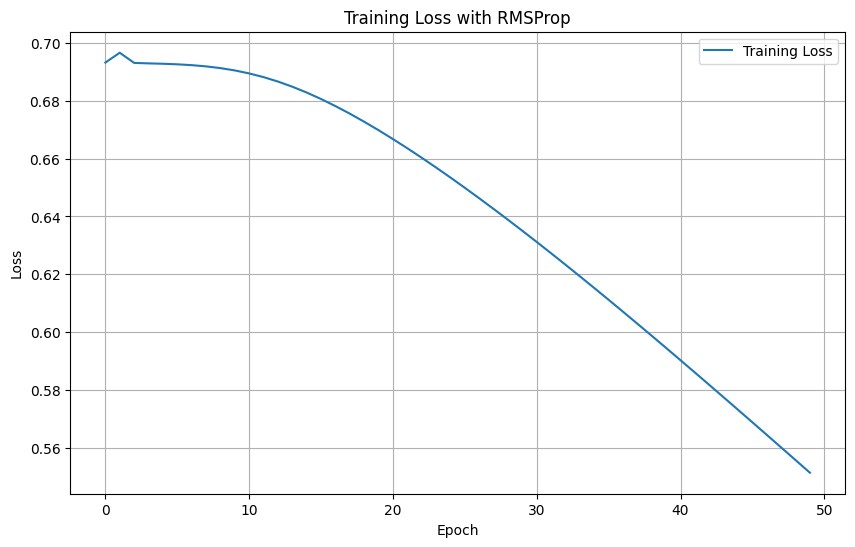

In [8]:
# Plotting the training loss
plt.figure(figsize=(10, 6))
plt.plot(training_loss, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss with RMSProp')
plt.legend()
plt.grid(True)
plt.show()